In [1]:
import os

import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pdf2image

from modules.ptn.pytorch.blobinator_dataset import BlobinatorDataset

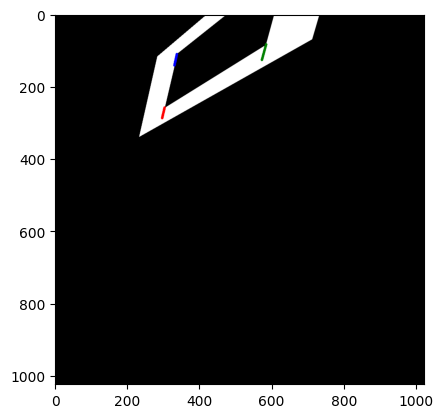

In [9]:
blobs = np.array(pdf2image.convert_from_path("test.pdf")[0])
keypoints = [
    ((0.2, 0.2), 100., 0.),
    ((0.8, 0.2), 100., 0.),
    ((0.8, 0.8), 100., 0.),
    ((0.2, 0.8), 100., 0.),
]
keypoints = list(
    map(
        lambda k: (
            (k[0][0] * blobs.shape[0], k[0][1] * blobs.shape[1]),
            k[1],
            k[2],
        ),
        keypoints,
    )
)
backgrounds = np.empty(shape=(1, 1024, 1024, 3))
for image_idx, image_path in enumerate(os.listdir("images")):
    backgrounds[image_idx] = cv.resize(
        cv.imread(os.path.join("images", image_path)), (1024, 1024)
    )
    break

dataset = BlobinatorDataset(blobs, keypoints, backgrounds)

for data in dataset:
    _, mapped_image, keypoints, mapped_keypoints = data
    for ((x, y), scale, rotation), color in zip(mapped_keypoints, matplotlib.colors.BASE_COLORS.values()):
        x2 = x - np.sin(rotation) * scale
        y2 = y + np.cos(rotation) * scale
        color = (color[0] * 255, color[1] * 255, color[2]* 255)
        cv.line(mapped_image, (int(x), int(y)), (int(x2), int(y2)), color, 5)
    plt.imshow(mapped_image)
    pass
